*Importing Important Libraries*

In [ ]:
import cv2
import os 
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision
from torch import optim 
from torch.utils.data import DataLoader

*Checking if GPU is Available*

In [ ]:
torch.cuda.is_available()

True

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
!wget https://internshala.com/uploads/chat-uploads/62a0cbb28b0f31654705074-2601258.zip

--2022-06-14 16:11:00--  https://internshala.com/uploads/chat-uploads/62a0cbb28b0f31654705074-2601258.zip
Resolving internshala.com (internshala.com)... 13.235.197.54, 15.206.64.2
Connecting to internshala.com (internshala.com)|13.235.197.54|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://s3-ap-southeast-1.amazonaws.com/internshala-uploads/chat-uploads/62a0cbb28b0f31654705074-2601258.zip [following]
--2022-06-14 16:11:01--  https://s3-ap-southeast-1.amazonaws.com/internshala-uploads/chat-uploads/62a0cbb28b0f31654705074-2601258.zip
Resolving s3-ap-southeast-1.amazonaws.com (s3-ap-southeast-1.amazonaws.com)... 52.219.133.58
Connecting to s3-ap-southeast-1.amazonaws.com (s3-ap-southeast-1.amazonaws.com)|52.219.133.58|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2601258 (2.5M) [application/zip]
Saving to: ‘62a0cbb28b0f31654705074-2601258.zip.1’

62a0cbb28b0f3165470 100%[===================>]   2.48M  1.72MB/s  

In [ ]:
!unzip 62a0cbb28b0f31654705074-2601258.zip -d /toy_dataset

Archive:  62a0cbb28b0f31654705074-2601258.zip
replace /toy_dataset/ToyDataset/toy_train.tar? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /toy_dataset/ToyDataset/toy_val.tar? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
!tar -xvf "/toy_dataset/ToyDataset/toy_train.tar" 
!tar -xvf "/toy_dataset/ToyDataset/toy_val.tar"

toy_train/
toy_train/circle/
toy_train/circle/297.jpg
toy_train/circle/483.jpg
toy_train/circle/521.jpg
toy_train/circle/678.jpg
toy_train/circle/892.jpg
toy_train/circle/397.jpg
toy_train/circle/82.jpg
toy_train/circle/486.jpg
toy_train/circle/762.jpg
toy_train/circle/985.jpg
toy_train/circle/113.jpg
toy_train/circle/813.jpg
toy_train/circle/655.jpg
toy_train/circle/208.jpg
toy_train/circle/191.jpg
toy_train/circle/928.jpg
toy_train/circle/935.jpg
toy_train/circle/909.jpg
toy_train/circle/931.jpg
toy_train/circle/552.jpg
toy_train/circle/844.jpg
toy_train/circle/946.jpg
toy_train/circle/234.jpg
toy_train/circle/291.jpg
toy_train/circle/881.jpg
toy_train/circle/5.jpg
toy_train/circle/188.jpg
toy_train/circle/604.jpg
toy_train/circle/456.jpg
toy_train/circle/502.jpg
toy_train/circle/36.jpg
toy_train/circle/465.jpg
toy_train/circle/3.jpg
toy_train/circle/921.jpg
toy_train/circle/93.jpg
toy_train/circle/184.jpg
toy_train/circle/504.jpg
toy_train/circle/594.jpg
toy_train/circle/811.jpg
toy

###Creating the training and validation data and Visualizing the images

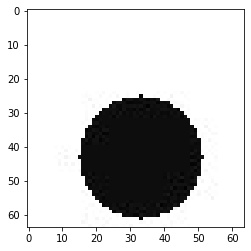

In [ ]:

data_dir_train = "/content/toy_train"
data_dir_val = "/content/toy_val"
categories = ['circle','rectangle']

for category in categories:
  path = os.path.join(data_dir_train,category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap = "gray")
    plt.show()
    break
  break

In [ ]:
#original size of the image
print(img_array.shape)

(64, 64)


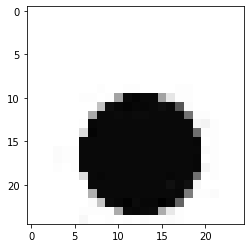

In [ ]:
#reducing the img size to 25,25 to reduce parameters in nn
img_size = 25

new_img = cv2.resize(img_array, (img_size,img_size))
plt.imshow(new_img, cmap = 'gray')
plt.show()

In [ ]:
training_data = []
val_data = []

def create_training_data():
  for category in categories:
    path = os.path.join(data_dir_train,category)
    class_num = categories.index(category)
    for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path,img))
      gray_image = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
      new_img = cv2.resize(gray_image, (img_size,img_size))
      training_data.append([torchvision.transforms.functional.to_tensor(new_img) , torch.tensor(class_num, dtype=torch.int8)])

def create_val_data():
  for category in categories:
    path = os.path.join(data_dir_val,category)
    class_num = categories.index(category)
    for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path,img))
      gray_image = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
      new_img = cv2.resize(gray_image, (img_size,img_size))
      val_data.append([torchvision.transforms.functional.to_tensor(new_img) , torch.tensor(class_num, dtype=torch.int8)])

create_training_data()
create_val_data()



In [ ]:
print(len(training_data))

1000


In [ ]:
training_data[0][0].shape

torch.Size([1, 25, 25])

In [ ]:
#randomizing the training and validation data lists 

import random

random.shuffle(training_data)
random.shuffle(val_data)

In [ ]:
#label of first 10 images in training data
for x,y in training_data[:10]:
    print(y)

tensor(1, dtype=torch.int8)
tensor(0, dtype=torch.int8)
tensor(1, dtype=torch.int8)
tensor(1, dtype=torch.int8)
tensor(0, dtype=torch.int8)
tensor(0, dtype=torch.int8)
tensor(1, dtype=torch.int8)
tensor(0, dtype=torch.int8)
tensor(1, dtype=torch.int8)
tensor(1, dtype=torch.int8)


In [ ]:
# label of first 10 images in validation data
for x,y in val_data[:10]:
    print(y)

tensor(0, dtype=torch.int8)
tensor(0, dtype=torch.int8)
tensor(1, dtype=torch.int8)
tensor(0, dtype=torch.int8)
tensor(1, dtype=torch.int8)
tensor(0, dtype=torch.int8)
tensor(1, dtype=torch.int8)
tensor(0, dtype=torch.int8)
tensor(0, dtype=torch.int8)
tensor(0, dtype=torch.int8)


using DataLoader, creating the train_loader and val_loader

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset = training_data)
val_loader = torch.utils.data.DataLoader(dataset = val_data)

### *Visualizing the Neural Network*

In [ ]:
def conv_output_shape(h_w, kernel_size=1, stride=1, pad=0, dilation=1):
    #by Duane Nielsen
    from math import floor
    if type(kernel_size) is not tuple:
        kernel_size = (kernel_size, kernel_size)
    h = floor( ((h_w[0] + (2 * pad) - ( dilation * (kernel_size[0] - 1) ) - 1 )/ stride) + 1)
    w = floor( ((h_w[1] + (2 * pad) - ( dilation * (kernel_size[1] - 1) ) - 1 )/ stride) + 1)
    return h, w

In [ ]:
#Calculating the final shape of input Features before flattening 

out = conv_output_shape((25,25), kernel_size=5, stride=1, pad=0, dilation=1)
print(out)
out1 = conv_output_shape(out, kernel_size=3, stride=1, pad=0, dilation=1)
print(out1)
out2 = conv_output_shape(out1, kernel_size=5, stride= 1, pad=0, dilation=1)
print(out2)
out3 = conv_output_shape(out2, kernel_size=3, stride=1, pad=0, dilation=1)
print(out3)
out4 = conv_output_shape(out3, kernel_size = 5, stride = 1, pad = 0, dilation = 1)
print(out4)
out5 = conv_output_shape(out4,kernel_size = 3, stride = 1, pad =0 , dilation = 1)
print(out5)

(21, 21)
(19, 19)
(15, 15)
(13, 13)
(9, 9)
(7, 7)


Creating the CNN with 3 Convolution Layers and 2 hidden Layers 

In [ ]:
class CNN(nn.Module):
  def __init__(self,out_1 = 16 ,out_2 = 32,out_3 = 64):
    super(CNN,self).__init__()
    self.cnn1 = nn.Conv2d(in_channels= 1 , out_channels = out_1 , kernel_size = 5)
    self.conv1_bn = nn.BatchNorm2d(out_1)
    self.maxpool1 = nn.MaxPool2d(kernel_size = 3, stride = 1)
    self.cnn2 = nn.Conv2d(in_channels= out_1 , out_channels = out_2 , kernel_size = 5)
    self.conv2_bn = nn.BatchNorm2d(out_2)
    self.maxpool2 = nn.MaxPool2d(kernel_size = 3, stride = 1)
    self.cnn3 = nn.Conv2d(in_channels = out_2, out_channels = out_3, kernel_size = 5)
    self.conv3_bn = nn.BatchNorm2d(out_3)
    self.maxpool3 = nn.MaxPool2d(kernel_size = 3, stride = 1)
    self.fc1 = nn.Linear(out_3*7*7,50)
    self.drop = nn.Dropout(0.50)
    self.fc2 = nn.Linear(50,2)
    


  def forward(self,x):
    x = self.cnn1(x)
    x = self.conv1_bn(x)
  #  print(x.shape)
    x = torch.relu(x)
    x = self.maxpool1(x)
   # print(x.shape)
    x = self.cnn2(x)
   # print(x.shape)
    x = self.conv2_bn(x)
    x = torch.relu(x)
    x = self.maxpool2(x)
  #  print(x.shape)
    x = self.cnn3(x)
   # print(x.shape)
    x = self.conv3_bn(x)
  #  print(x.shape)
    x = torch.relu(x)
    x = self.maxpool3(x)
   # print(x.shape)
    x = x.view(x.shape[0], -1)
    x = self.fc1(x)
    x = self.drop(x)
    x = torch.relu(x)
    x = self.fc2(x)
    return x

Creating the CNN model adn sending it to available device

In [ ]:
model = CNN()
model.to(device)

CNN(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv1_bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool1): MaxPool2d(kernel_size=3, stride=1, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2_bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool2): MaxPool2d(kernel_size=3, stride=1, padding=0, dilation=1, ceil_mode=False)
  (cnn3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv3_bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool3): MaxPool2d(kernel_size=3, stride=1, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3136, out_features=50, bias=True)
  (drop): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=50, out_features=2, bias=True)
)

Setting value of: 

 --> epochs

 --> defining: criterion for loss calculation

 --> defining: optimizer with learning rate and model parameters (weight and bias)

--> empty lists for calculation of both cost and accuracy loss for training and validation data


In [ ]:
n_epochs = 10
cost_list_train = []
accuracy_list_train = []
cost_list_val = []
accuracy_list_val = []
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr = 0.001)

Setting our model to train

In [ ]:
model.train()

CNN(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv1_bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool1): MaxPool2d(kernel_size=3, stride=1, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2_bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool2): MaxPool2d(kernel_size=3, stride=1, padding=0, dilation=1, ceil_mode=False)
  (cnn3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv3_bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool3): MaxPool2d(kernel_size=3, stride=1, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3136, out_features=50, bias=True)
  (drop): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=50, out_features=2, bias=True)
)

###*Training The CNN Model*

In [ ]:
for epoch in range(n_epochs):
    epoch_loss = 0
    epoch_accuracy = 0
    for x,y in train_loader:
      y = y.type(torch.LongTensor)
      x,y  = x.to(device), y.to(device)
     
      z = model(x)
      loss = criterion(z,y)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      #cost +=loss.item()
      #cost_list.append(cost)  

      acc = ((z.argmax(dim=1) == y).float().mean())
      epoch_accuracy += acc/len(train_loader)
      epoch_loss += loss/len(train_loader)
    accuracy_list_train.append(torch.IntTensor.item(epoch_accuracy))
    cost_list_train.append(torch.IntTensor.item(epoch_loss))
    print('Epoch : {}, train accuracy : {}, train loss : {}'.format(epoch+1, epoch_accuracy,epoch_loss))


    with torch.no_grad():
         epoch_val_accuracy=0
         epoch_val_loss =0
         for x,y in val_loader:
             y = y.type(torch.LongTensor)
             x,y  = x.to(device), y.to(device)
             z = model(x)
             val_loss = criterion(z,y)
             acc = ((z.argmax(dim=1) == y).float().mean())
             epoch_val_accuracy += acc/ len(val_loader)
             epoch_val_loss += val_loss/ len(val_loader)
             
         accuracy_list_val.append(torch.IntTensor.item(epoch_val_accuracy))
         cost_list_val.append(torch.IntTensor.item(epoch_val_loss))
         print('Epoch : {}, val_accuracy : {}, val_loss : {}'.format(epoch+1, epoch_val_accuracy,epoch_val_loss))

Epoch : 1, train accuracy : 0.5529964566230774, train loss : 0.7461625933647156
Epoch : 1, val_accuracy : 0.5849996209144592, val_loss : 0.6395840048789978
Epoch : 2, train accuracy : 0.5989958643913269, train loss : 0.6443204283714294
Epoch : 2, val_accuracy : 0.6249995827674866, val_loss : 0.6358368992805481
Epoch : 3, train accuracy : 0.6119956970214844, train loss : 0.6333438754081726
Epoch : 3, val_accuracy : 0.569999635219574, val_loss : 0.6671736240386963
Epoch : 4, train accuracy : 0.6339954137802124, train loss : 0.6249018311500549
Epoch : 4, val_accuracy : 0.6099995970726013, val_loss : 0.6005814671516418
Epoch : 5, train accuracy : 0.6339954137802124, train loss : 0.5892736911773682
Epoch : 5, val_accuracy : 0.6099995970726013, val_loss : 0.6168148517608643
Epoch : 6, train accuracy : 0.6969946026802063, train loss : 0.5591133236885071
Epoch : 6, val_accuracy : 0.7149994969367981, val_loss : 0.5470283627510071
Epoch : 7, train accuracy : 0.7229942679405212, train loss : 0.52

###*Graphs representing the cost and accuracy for training and validation data*

Graph for Training Data

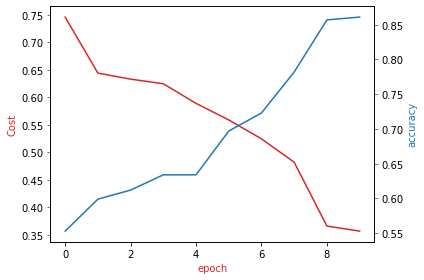

In [ ]:
#graph between epoch, cost and accuracy for Training Data


fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(cost_list_train, color=color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('Cost', color=color)
ax1.tick_params(axis='y', color=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color) 
ax2.set_xlabel('epoch', color=color)
ax2.plot( accuracy_list_train, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

Graph for validation Data

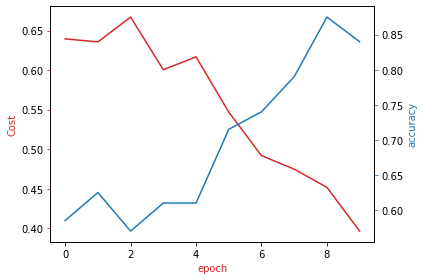

In [ ]:
#graph between epoch, cost and accuracy for Validation Data

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(cost_list_val, color=color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('Cost', color=color)
ax1.tick_params(axis='y', color=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color) 
ax2.set_xlabel('epoch', color=color)
ax2.plot(accuracy_list_val, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

###*Predictions*

Displaying the first 10 correctly predicted values on validation data

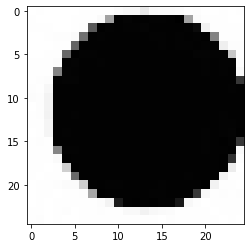

yhat:  circle


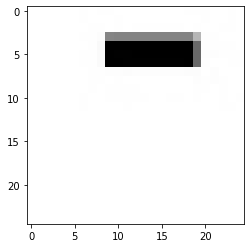

yhat:  rectangle


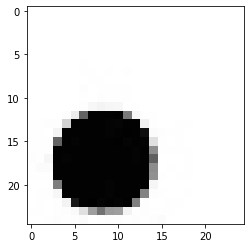

yhat:  circle


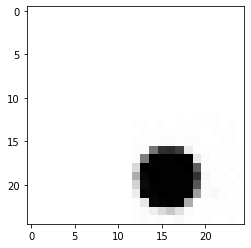

yhat:  circle


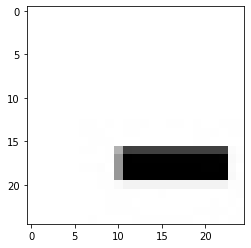

yhat:  rectangle


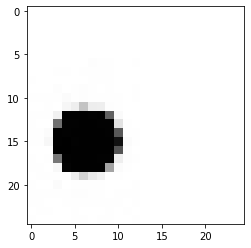

yhat:  circle


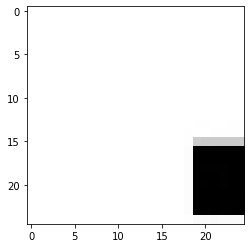

yhat:  rectangle


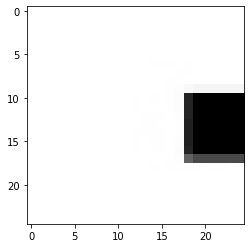

yhat:  rectangle


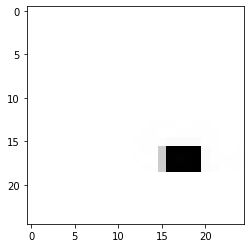

yhat:  rectangle


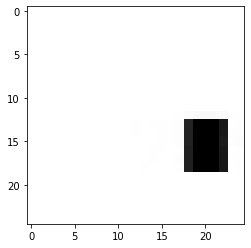

yhat:  rectangle


In [ ]:
count = 0
categ ={ 0 : 'circle' , 1 : 'rectangle'}
model.eval()
for x, y in torch.utils.data.DataLoader(dataset=val_data, batch_size=1):
    x,y = x.to(device) , y.to(device)
    z = model(x)
    _, yhat = torch.max(z, 1)
    
    if yhat == y:
        x = x.cpu()
        plt.imshow(x.reshape(img_size,img_size), cmap = 'gray')
        plt.show()
        print("yhat: " ,categ[torch.IntTensor.item(yhat)])
        count += 1
    if count >= 10:
        break  

###*Class method that takes a cv2 image as an input and returns a prediction string as an output*


In [ ]:
class Predict_Image_type():
  def __init__(self,name):
      self.img_path = '/content/' + name
      self.img_array = cv2.imread(self.img_path)
      self.gray_img = cv2.cvtColor(self.img_array, cv2.COLOR_BGR2GRAY)
      self.new_img = cv2.resize(self.gray_img ,(img_size,img_size))
      self.img_tensor =  torchvision.transforms.functional.to_tensor(new_img)
      self.img_tensor = self.img_tensor.reshape(1,1,img_size,img_size)
 
  def show_img(self):
      plt.imshow(self.new_img, cmap= 'gray')  

  def predict(self):
      model.eval()
      with torch.no_grad():
        self.img_tensor = self.img_tensor.to(device)
        z = model(self.img_tensor)
        yhat = z.argmax(dim=1)
        category ={ 0 : 'circle' , 1 : 'rectangle'}
        value = category[torch.IntTensor.item(yhat)]
      return value


Upload the image

In [ ]:
from google.colab import files
img_file = files.upload()

for fn in img_file.keys():
    name = fn

Saving 168.jpg to 168.jpg


The Image 

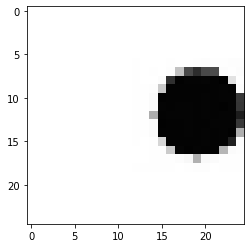

In [ ]:
Predict_Image_type(name).show_img()

In [ ]:
print("Image is of :  {}".format(Predict_Image_type(name).predict()))

Image is of :  circle
